## Setup

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Lists the files in the data folder

In [2]:
import os
print(os.listdir("data"))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


Reads in the csv-files and creates a dataframe using pandas

In [3]:
train_org = pd.read_csv('data/train.csv')
test_org = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train = train_org.copy()
test = test_org.copy()

test_id = test['id']

# Exploring the data

In [4]:
train.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
test.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

Check missing values in train and test

In [8]:
train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
status                      0
id                          0
release_date                0
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
revenue                     0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
popularity                  0
original_title              0
original_language           0
imdb_id                     0
budget                      0
id                          0
dtype: int64

We see that there is many empty cells in the sets. Specially in the columns: belongs_to_collection and homepage

In [10]:
train.shape, test.shape

((3000, 23), (4398, 22))

### Belongs To Collection

In [11]:
for i in range(10):
    print(train['belongs_to_collection'][i])

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
nan
nan
nan
nan
nan
nan
[{'id': 256377, 'name': 'The Muppet Collection', 'poster_path': '/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg', 'backdrop_path': '/1AWd3MM90G47mxtD112gRDxSXY9.jpg'}]
nan


We want to check if having a collection is relevant. Return 1 if movie belongs to a collection, 0 otherwise

In [12]:
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if x is np.nan else 1)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: 0 if x is np.nan else 1)

Show the distribution of revenue for movies with or without a collection

<Figure size 576x360 with 0 Axes>

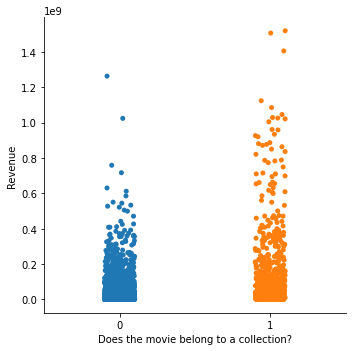

In [13]:
plt.figure(figsize=(8, 5))
sns.catplot(x='has_collection', y='revenue', data=train)
plt.xlabel('Does the movie belong to a collection?')
plt.ylabel('Revenue')
plt.show()

This can be useful. The plots shows us that movies within a collection usually have higher revenues 

### Budget

In [14]:
train['budget'].unique()

array([ 14000000,  40000000,   3300000,   1200000,         0,   8000000,
         6000000,   1000000,  15000000,  53000000, 102000000,    500000,
        26000000,  32000000,  80000000,   4000000,  10000000,  11000000,
        45000000,  13000000,  90000000, 140000000,  30000000,  50000000,
         3800000,   3000000,  25000000,   3906840,  44000000,  38000000,
          560000,  12000000,  20000000, 125000000, 150000000,   5000000,
         1500000,   2000000,  85000000,  29000000,    445000,  17000000,
        10284523,  43000000,  28000000,   7500000,  35000000,   2500000,
        10500000,   7000000,  60000000,  10900000,  31000000,  72000000,
        75000000, 100000000,  93000000,  12716953,  18000000,   2400000,
        65000000,   9000000, 110000000,  14320000,   3500000,  39200000,
        63600000,    125000,  19000000,  12468389,  82500000,    259000,
       180000000,   4500000,  24000000,  12600000,  55000000,   3200000,
        22000000,   6700000,   2600000,  49000000, 

Zeros mean unknown budget

In [15]:
train[train['budget'] == 0].shape[0]

812

There is many unknown budgets in the sets

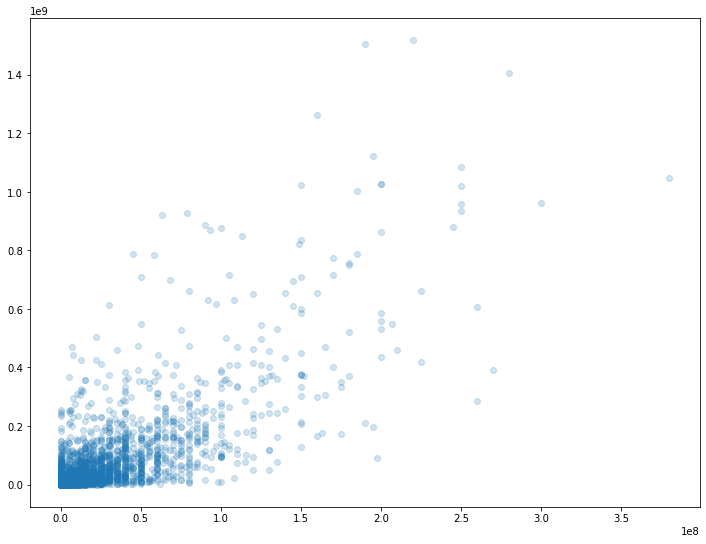

In [16]:
plt.subplots(figsize=(12,9))
plt.scatter(x=train['budget'], y=train['revenue'], alpha=0.2)

We see that budget and revenue is related somewhat lineary. It means that budget is very relevant.

### Genres

In [17]:
for i in range(10):
    print(train['genres'][i])

[{'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]
[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 99, 'name': 'Documentary'}]
[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]


Some of the movies have more than one type of genre

Converting genres from JSON format to dictionary format to analyse them better. Got this information from: https://www.kaggle.com/zimulyu/tmdb-box-office-pred

In [18]:
def text_to_dict(df):
    df['genres'] = df['genres'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train = text_to_dict(train)
test = text_to_dict(test)

We want to extract genres of each movie

In [19]:
genres_per = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
genres_per

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres, Length: 3000, dtype: object

/opt/anaconda3/envs/dat158/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


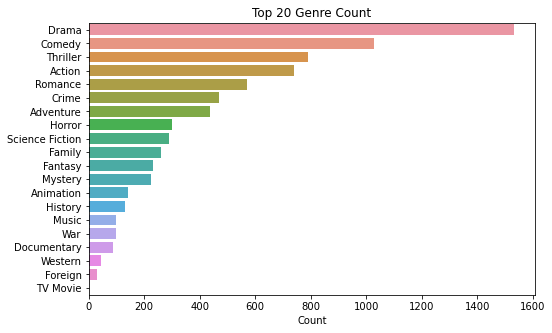

In [20]:
from collections import Counter

genres_count = Counter([i for j in genres_per for i in j]).most_common()
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in genres_count],[val[0] for val in genres_count])
plt.xlabel('Count')
plt.title('Top 20 Genre Count')
plt.show()

Shows which genre is the most common

### Homepage

In [21]:
train['homepage'].value_counts(dropna=False)

NaN                                      2054
http://www.transformersmovie.com/           4
http://www.thehobbit.com/                   2
http://www.lordoftherings.net/              2
http://www.idanielblake.co.uk/              1
                                         ... 
http://movies.disney.com/the-pacifier       1
http://admiralfilm.ru/                      1
http://www.jackreachermovie.com/            1
http://www.sleepdealer.com/                 1
http://www.abductionthefilm.com/            1
Name: homepage, Length: 942, dtype: int64

We see that there is many movies without a homepage, so we want to apply a has_homepage feature.

In [22]:
train['has_homepage'] = train['homepage'].apply(lambda x: 0 if x is np.nan else 1)
test['has_homepage'] = test['homepage'].apply(lambda x: 0 if x is np.nan else 1)

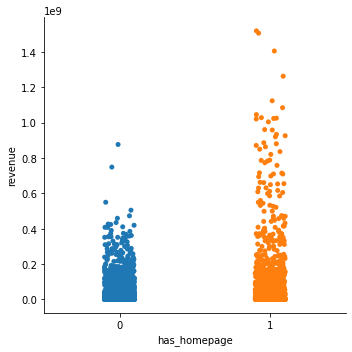

In [23]:
sns.catplot(x='has_homepage', y='revenue', data=train)

This scatter plot shows that having a homepage for the movie affects its revenue

In [24]:
#train.drop(['homepage'], axis=1, inplace=True)

### Imdb Id

In [25]:
train['imdb_id']

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [26]:
#train.drop['imdb_id'], axis=1, inplace=True

### Original Language

In [27]:
print("Number of original languages: ", len(train['original_language'].value_counts(dropna=False)))
train['original_language'].value_counts(dropna=False)


Number of original languages:  36


en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64

In [28]:
print("Number of original languages: ", len(test['original_language'].value_counts(dropna=False)))
test['original_language'].value_counts(dropna=False)

Number of original languages:  39


en    3776
fr     121
hi      76
ru      62
ja      53
es      52
it      32
de      31
ko      29
zh      27
cn      21
ta      15
sv      12
da      12
ml      10
pt       7
te       7
tr       6
ro       5
nl       5
th       5
he       5
no       3
pl       3
fi       2
xx       2
cs       2
bn       2
bm       2
sr       2
el       2
id       2
is       1
kn       1
ca       1
ur       1
af       1
ka       1
hu       1
Name: original_language, dtype: int64

<AxesSubplot:xlabel='original_language', ylabel='revenue'>

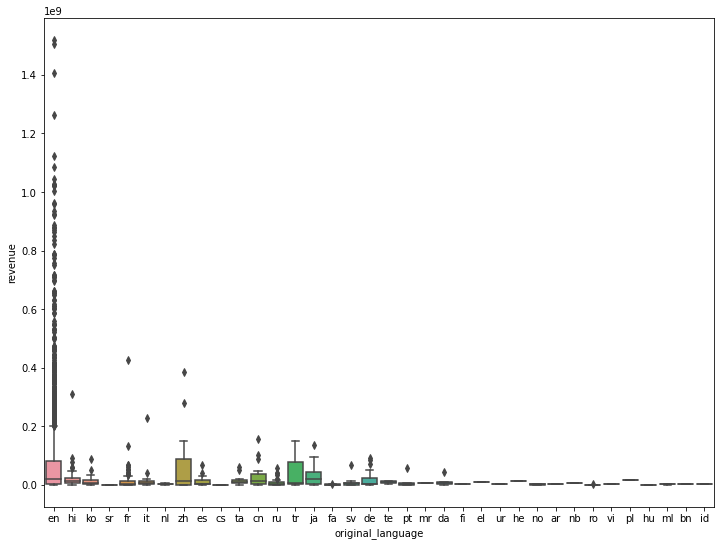

In [29]:
plt.subplots(figsize=(12, 9))
sns.boxplot(x=train['original_language'], y=train['revenue'])

The plots shows us that the movies with most revenue have english as original language. With this in mind we make a new feature (is English Original Language)

In [30]:
train['is_en_original_language'] = train['original_language'].apply(lambda x: 1 if x == 'en' else 0)
test['is_en_original_language'] = test['original_language'].apply(lambda x: 1 if x == 'en' else 0)

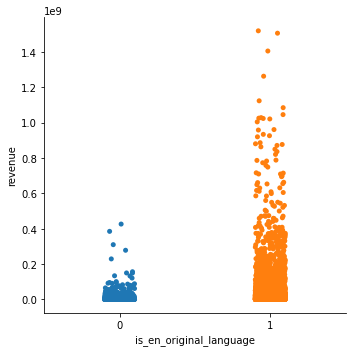

In [31]:
sns.catplot(x='is_en_original_language', y='revenue', data=train)

Here we see how great the difference in revenue is between english and other original languages. This will come in handy

### Overview

In [32]:
for i in range(5):
    print(train['overview'][i])
    print("--------------------------------------------------------------")

When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.
--------------------------------------------------------------
Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...
--------------------------------------------------------------
Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.
--------------------------------------------------------------
Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alon

Overview is not going to help us

In [33]:
#train.drop(['overview'], axis=1, inplace=True)
#test.drop(['overview'], axis=1, inplace=True)

### Popularity

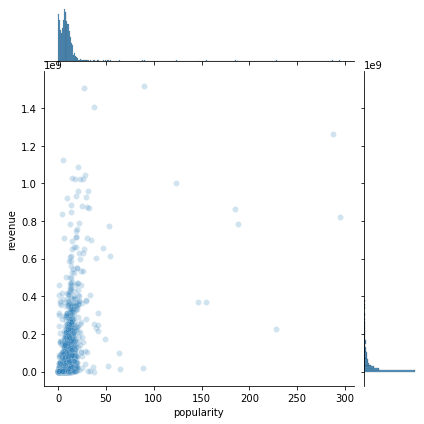

In [34]:
# plot popularity vs revenue
sns.jointplot(x="popularity", y="revenue", alpha=0.2, data=train)
plt.show()

Popularity doesn´t have obvious relationship with the revenue, but it´s still interesting.

### Production companies

In [35]:
for i, e in enumerate(train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


One movie can have many production companies.
We will convert this column from JSON as well to analyze it better

In [36]:
def text_to_dict(df):
    df['production_companies'] = df['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train = text_to_dict(train)
test = text_to_dict(test)

/opt/anaconda3/envs/dat158/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


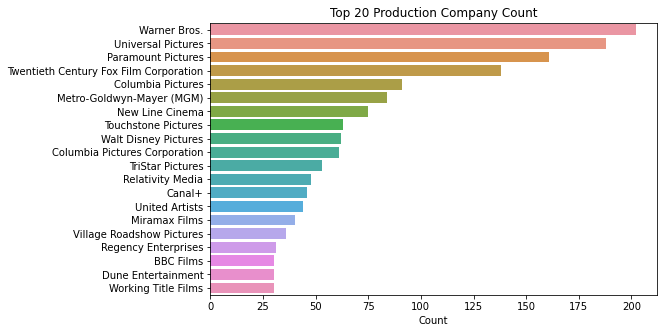

In [37]:
companies_per = train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
companies_count = Counter([i for j in companies_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in companies_count],[val[0] for val in companies_count])
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

Shows top 20 production company (ranked by number of movies)

### Production countries

In [38]:
for i, e in enumerate(train['production_countries'][:20]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5 nan
6 [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
7 nan
8 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
9 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
10 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
11 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
12 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
13 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
14 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
15 [{'iso_3166_1': 'RS', 'name': 'Serbia'}]
16 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
17 [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
18 [{'iso_3166_1': 'AT',

Since most of the movies are made in USA, it would be useful to have a feature 'us_production'

In [39]:
def is_US(a):
    if 'US' in a:
        return 1
    else: return 0

train['us_production'] = train['production_countries'].apply(lambda x: 0 if x is np.nan else is_US(x))
test['us_production'] = test['production_countries'].apply(lambda x: 0 if x is np.nan else is_US(x))

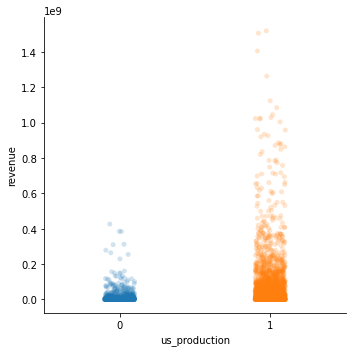

In [40]:
sns.catplot(x='us_production', y='revenue', alpha=0.2, data=train)

### Release date

Since only last two digits of year are provided, we adjust it to get the correct year

In [41]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 

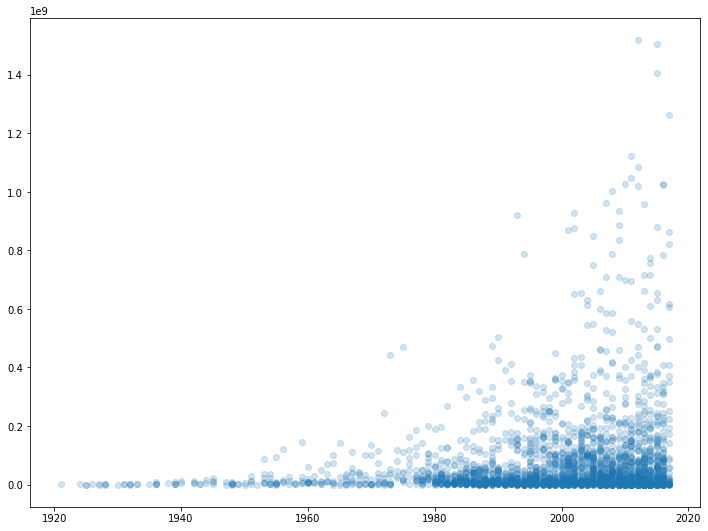

In [42]:
plt.subplots(figsize=(12, 9))
plt.scatter(x=train['release_year'], y=train['revenue'], alpha=0.2)

We see that newer movies have higher revenue

### Status

In [43]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [44]:
train.loc[train['status'] == 'Rumored'][['status','revenue']]

,status,revenue
609,Rumored,273644
1007,Rumored,60
1216,Rumored,13418091
1618,Rumored,229000


4 movies are yet to release and revenue is already given

### Cast

In [45]:
for i, e in enumerate(train['cast'][:3]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

Number of actors (size of cast) in a movie can be relevant

In [46]:
train['cast_size'] = train['cast'].apply(lambda x: 0 if x is np.nan else x.count('{'))
test['cast_size'] = test['cast'].apply(lambda x: 0 if x is np.nan else x.count('{'))

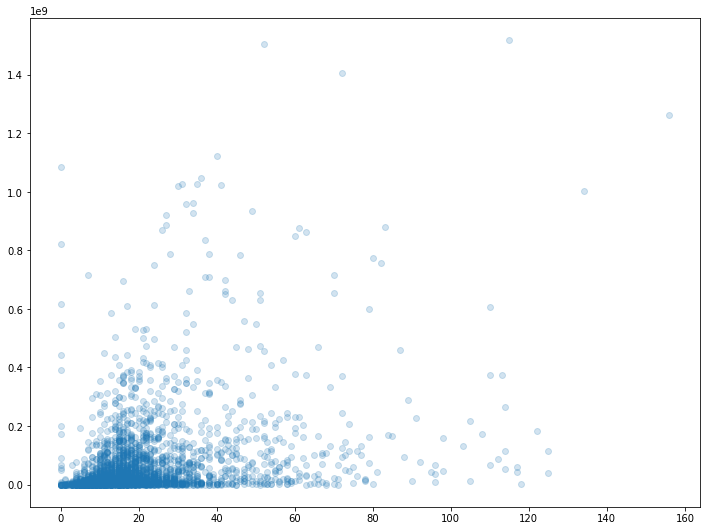

In [47]:
plt.subplots(figsize=(12, 9))
plt.scatter(x=train['cast_size'], y=train['revenue'], alpha=0.2)

### Crew

Lets make crew_size since it is as relevant as cast_size

In [48]:
train['crew_size'] = train['crew'].apply(lambda x: 0 if x is np.nan else x.count('{'))
test['crew_size'] = test['crew'].apply(lambda x: 0 if x is np.nan else x.count('{'))

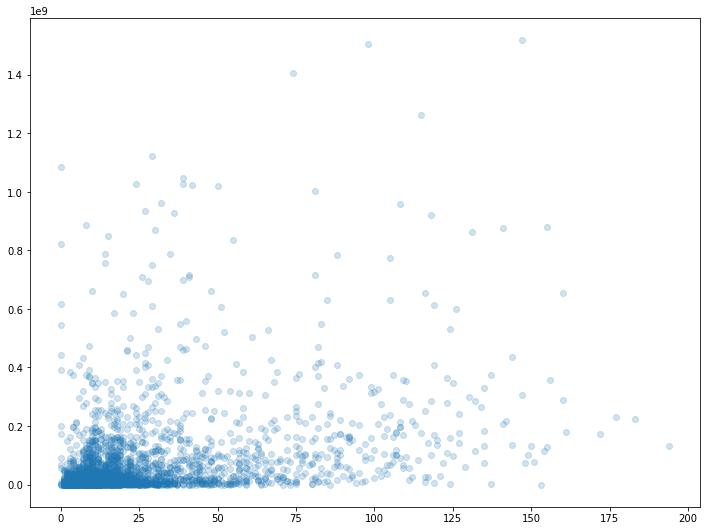

In [49]:
plt.subplots(figsize=(12, 9))
plt.scatter(x=train['crew_size'], y=train['revenue'], alpha=0.2)

#### Drop columns of no interest:
We have analysed the most relevant columns and made new features. Now its time to drop the columns we don´t need. 

In [50]:
train.drop(['belongs_to_collection'], axis=1, inplace=True)
train.drop(['homepage'], axis=1, inplace=True)
train.drop(['original_title'], axis=1, inplace=True)
train.drop(['overview'], axis=1, inplace=True)
train.drop(['poster_path'], axis=1, inplace=True)
train.drop(['release_date'], axis=1, inplace=True)

test.drop(['belongs_to_collection'], axis=1, inplace=True)
test.drop(['homepage'], axis=1, inplace=True)
test.drop(['original_title'], axis=1, inplace=True)
test.drop(['overview'], axis=1, inplace=True)
test.drop(['poster_path'], axis=1, inplace=True)
test.drop(['release_date'], axis=1, inplace=True)

In [51]:
train.shape, test.shape

((3000, 26), (4398, 22))

In [52]:
train_c = train.copy()
test_c = test.copy()

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3000 non-null   int64  
 1   budget                   3000 non-null   int64  
 2   genres                   3000 non-null   object 
 3   imdb_id                  3000 non-null   object 
 4   original_language        3000 non-null   object 
 5   popularity               3000 non-null   float64
 6   production_companies     3000 non-null   object 
 7   production_countries     2945 non-null   object 
 8   runtime                  2998 non-null   float64
 9   spoken_languages         2980 non-null   object 
 10  status                   3000 non-null   object 
 11  tagline                  2403 non-null   object 
 12  title                    3000 non-null   object 
 13  Keywords                 2724 non-null   object 
 14  cast                    

We got multiple attributes with missing values:

production_countries,
runtime,
spoken_languages,
tagline,
Keywords,
cast,
crew

There are still some columns from which revenue prediction doesn´t affect. It´s also many attributes of object we can´t make our prediction of. We delete all columns we won´t need

In [54]:
train.drop(['genres','imdb_id', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'release_month', 'release_day','release_year'], axis=1, inplace=True)

test.drop(['genres','imdb_id', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

### Looking for correlations

Computing the standard correlation coefficient between every pair of attributes using the corr() method. By doing this we can see how much the attributes correlates with the revenue

In [55]:
corr_matrix = train.corr()
corr_matrix['revenue'].sort_values(ascending=False)

revenue                    1.000000
budget                     0.752965
popularity                 0.461460
crew_size                  0.372110
has_collection             0.339425
cast_size                  0.335737
has_homepage               0.263179
runtime                    0.216380
us_production              0.197595
is_en_original_language    0.142130
id                         0.000610
Name: revenue, dtype: float64

# Preparing the data

We are not going to need revenue anymore.

We want to create a SimpleImputer instance, specifying that each attribute´s missing values is being replaced with the median of that attribute.

In [56]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

train_labels = train['revenue'].copy()
train = train.drop('revenue', axis=1)

train_df = pd.DataFrame(train)
train_num = train_df.drop('id', axis=1)

test_df = pd.DataFrame(test)
test_num = test_df.drop('id', axis=1)

imputer.fit(train_num)

SimpleImputer(strategy='median')

Now we use this trained imputer to transform the training set by replacing missing values by the learned medians. The result is a NumPy array that we convert back to pandas Dataframe.

In [57]:
T = imputer.transform(train_num)
train_tr = pd.DataFrame(T, columns=train_num.columns)

## Transformation pipelines

The pipeline class helps data transformation steps to be executed in the right order. The pipeline´s fit() method calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, which it just calls the fit() method.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
train_num_tr = num_pipeline.fit_transform(train_num)

In [59]:
train_num.head()

,budget,popularity,runtime,has_collection,has_homepage,is_en_original_language,us_production,cast_size,crew_size
0,14000000,6.575393,93.0,1,0,1,1,24,72
1,40000000,8.248895,113.0,1,0,1,1,20,9
2,3300000,64.299990,105.0,0,1,1,1,51,64
3,1200000,3.174936,122.0,0,1,0,0,7,3
4,0,1.148070,118.0,0,0,0,0,4,2


In [60]:
test_num.head()

,budget,popularity,runtime,has_collection,has_homepage,is_en_original_language,us_production,cast_size,crew_size
0,0,3.851534,90.0,1,1,0,1,7,2
1,88000,3.559789,65.0,0,0,1,1,10,8
2,0,8.085194,100.0,0,0,1,1,9,10
3,6800000,8.596012,130.0,0,1,0,0,23,69
4,2000000,3.217680,92.0,0,0,1,1,4,14


In [61]:
from sklearn.compose import ColumnTransformer 

num_attribs = list(train_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])
train_prep = full_pipeline.fit_transform(train_num)
test_prep = full_pipeline.transform(test_num)

## Select and train a model
Now the data is prepared for Machine Learning algorithms
### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

x = train_prep
y = train_labels

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(x)
lin_mse = mean_squared_error(y, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81708228.82319719

### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x, y)

forest_reg_predictions = forest_reg.predict(x)
forest_mse = mean_squared_error(y, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

29971340.494429678

### Evaluate the best models

In [65]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [66]:
lin_scores = cross_val_score(lin_reg, x, y,
 scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [83146838.17357022 83938286.3186312  92106061.8320393  81062545.29258846
 74598011.67442112 95431685.93034232 68027620.47003707 79239639.79785371
 85494631.85806112 78937399.99862222]
Mean: 82198272.13461666
Standard deviation: 7532124.18383581


In [67]:
forest_scores = cross_val_score(forest_reg, x, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [71192650.19857074 73420628.70537154 93063526.78893767 78462758.90586407
 80175852.02885894 95933557.17212747 63019382.52457488 79795259.22417448
 81934481.41285552 72778923.23290567]
Mean: 78977702.0194241
Standard deviation: 9389377.362912165


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
                             print(np.sqrt(-mean_score), params)

93834917.35331166 {'max_features': 2, 'n_estimators': 3}
80429134.40389296 {'max_features': 2, 'n_estimators': 10}
77599958.39150698 {'max_features': 2, 'n_estimators': 30}
92227300.06628938 {'max_features': 4, 'n_estimators': 3}
79831441.96904689 {'max_features': 4, 'n_estimators': 10}
78822828.38423641 {'max_features': 4, 'n_estimators': 30}
93122487.77363569 {'max_features': 6, 'n_estimators': 3}
80354131.230786 {'max_features': 6, 'n_estimators': 10}
79497001.37436165 {'max_features': 6, 'n_estimators': 30}
89970453.35766451 {'max_features': 8, 'n_estimators': 3}
81149836.92404091 {'max_features': 8, 'n_estimators': 10}
79127920.05169149 {'max_features': 8, 'n_estimators': 30}
90034869.7302688 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
82768165.45740572 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
90992629.43001497 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
80584767.47629832 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
8

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.32664376, 0.21020476, 0.12565779, 0.06876568, 0.03976819,
       0.00694551, 0.01174299, 0.09822524, 0.11204609])

In [71]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.3266437562317217, 'budget'),
 (0.21020476052233192, 'popularity'),
 (0.1256577920575783, 'runtime'),
 (0.11204609295294116, 'crew_size'),
 (0.09822523849651366, 'cast_size'),
 (0.06876567949705643, 'has_collection'),
 (0.03976818736978435, 'has_homepage'),
 (0.0117429857949814, 'us_production'),
 (0.006945507077091054, 'is_en_original_language')]

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

## Final model

In [73]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_prep)

In [74]:
len(final_predictions)

4398

## Submission

In [75]:
submission = pd.DataFrame({'Id': test_id, 'revenue': final_predictions})

In [76]:
submission.head()

,Id,revenue
0,3001,2.445399e+07
1,3002,5.474540e+06
2,3003,1.299597e+07
3,3004,4.104884e+07
4,3005,5.137673e+06


In [77]:
submission.to_csv('submission.csv', index=False)

## Export trained model

In [79]:
from joblib import dump
dump(final_model, 'models/TMBDpred_rf.joblib', compress=6)

['models/TMBDpred_rf.joblib']